In [1]:
from windwhisper import windturbines

In [2]:
wind_turbines = [
    {"name": "Turbine 1", "power": 2.5e3, "diameter": 100, "hub height": 80, "position": (47.346060, 8.508267)},
    {"name": "Turbine 2", "power": 3.0e3, "diameter": 105, "hub height": 85, "position": (47.3869, 8.5517)},
    #{"name": "Turbine 3", "power": 3.5e3, "diameter": 110, "hub height": 90, "position": (47.3969, 8.5617)},
    #{"name": "Turbine 4", "power": 4.0e3, "diameter": 115, "hub height": 95, "position": (47.3869, 8.5317)},
    #{"name": "Turbine 5", "power": 4.0e3, "diameter": 120, "hub height": 95, "position": (47.34955801547433, 8.491580864126439)},
]

wt = windturbines.WindTurbines(wind_turbines=wind_turbines)

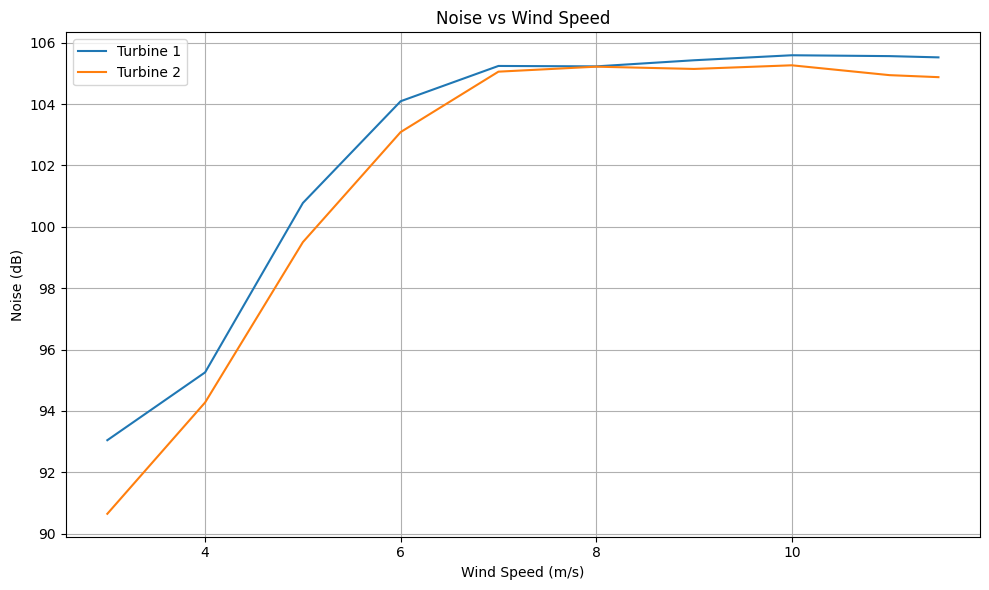

In [3]:
wt.plot_noise_curve()

In [4]:
wt.fetch_wind_speeds()

Starting concurrent data download for all turbines...


In [18]:
wt.wind_speed.to_array().shape

(2, 2, 52608)

In [29]:
resampled = wt.wind_speed.to_array().resample(indexer={"time":"1H"}).sum()

In [30]:
resampled

<xarray.DataArray (variable: 2, turbine: 2, time: 26304)>
array([[[448.0161   , 441.55133  , 459.64606  , ..., 477.90027  ,
         512.706    , 473.39978  ],
        [384.28558  , 382.4368   , 362.8822   , ..., 245.28168  ,
         279.6103   , 282.56     ]],

       [[  2.307534 ,   3.44411  ,   2.474405 , ...,   3.0431705,
           3.0025902,   2.6817443],
        [  4.189107 ,   3.8587942,   2.0251493, ...,   1.5594136,
           1.6028308,   2.3080404]]], dtype=float32)
Coordinates:
  * turbine   (turbine) <U9 'Turbine 1' 'Turbine 2'
  * variable  (variable) object 'WD10' 'WS10'
  * time      (time) datetime64[ns] 2016-01-01 ... 2018-12-31T23:00:00
Attributes: (12/138)
    ADAPT_DT_MAX:                    15.0
    ADAPT_DT_MIN:                    3.0
    ADAPT_DT_START:                  13.0
    AER_ANGEXP_OPT:                  1
    AER_ANGEXP_VAL:                  1.2999999523162842
    AER_AOD550_OPT:                  1
    ...                              ...
    eastBoundLongitude:              8.508267
    verticalExtentMinimum:           50.0
    verticalExtentMaximum:           500.0
    temporalExtentMinimum:           2016-01-01T00:00:00
    temporalExtentMaximum:           2018-12-31T23:30:00
    subset_pid:                      https://wps.neweuropeanwindatlas.eu/api/...

In [70]:
import numpy as np
import pandas as pd
import xarray as xr

da = wt.wind_speed.to_array()
# Convert to DataFrame
df = da.to_dataframe("val").reset_index()

# Create bins for wind direction and wind speed
wd_bins = np.arange(0, 360 + 30, 30)  # creates [0, 30, 60, ..., 360]
ws_max = df[df['variable'] == 'WS10']['val'].max()
ws_bins = np.arange(0, ws_max + 1, 1)  # creates wind speed bins of 1 m/s width

# Create a function to bin the data
def bin_data(value, bins):
    bin_labels = [f'{left}-{right}' for left, right in zip(bins[:-1], bins[1:])]
    bin_idx = np.digitize(value, bins) - 1  # Get the index of the bin
    return bin_labels[bin_idx] if 0 <= bin_idx < len(bin_labels) else None

# Bin the wind direction and wind speed data
df['bin'] = df.apply(lambda row: bin_data(row['val'], wd_bins) if row['variable'] == 'WD10' else bin_data(row['val'], ws_bins), axis=1)

# Now, group by the turbine, variable, and bin, then count the number of occurrences in each group
grouped = df.groupby(['turbine', 'variable', 'bin']).size().reset_index(name='count')

# Create a pivot table to organize the data into a 3D structure
pivot = grouped.pivot_table(index='turbine', columns=['variable', 'bin'], values='count', fill_value=0)

# Convert the pivot table to a DataArray
result_da = xr.DataArray(pivot)

In [72]:
result_da

(2, 31)

Would you like to use 'NoisePoint' or 'NoiseMap'?  NoiseMap
Enter the number of wind turbines:  2
Enter the air absorption coefficient alpha [dB/km]:  1.5
Enter the x-coordinate of wind turbine 1 (in meters):  150
Enter the y-coordinate of wind turbine 1 (in meters):  150
Enter the noise level at source of wind turbine 1 in dB:  105
Enter the x-coordinate of wind turbine 2 (in meters):  50
Enter the y-coordinate of wind turbine 2 (in meters):  50
Enter the noise level at source of wind turbine 2 in dB:  100


Wind turbine at (150.0, 150.0) has intensity_level 5.197061032393584e-08 W/m2 at a distance 212.13203435596427 m
Wind turbine at (50.0, 50.0) has intensity_level 1.553150461020322e-07 W/m2 at a distance 70.71067811865476 m
The total_intensity_level is 2.0728565642596804e-07 W/m2 or 53.165692511986656 dB


Enter the x-coordinate of the listening point (in meters):  45
Enter the y-coordinate of the listening point (in meters):  -50


The noise level at the listening point (45.0, -50.0) is 51.09569142863698 dB


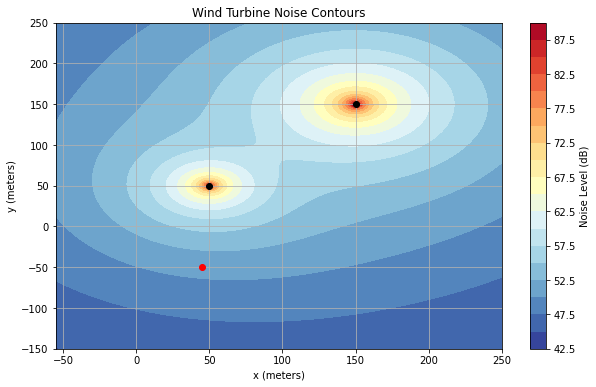

ImportError: cannot import name 'NoiseEmissions' from 'noisemodel.noise' (/Users/romain/GitHub/noisemodel/noisemodel/noise.py)

In [1]:
from noisemodel.noise import NoisePoint

In [3]:
n = NoiseEmissions("Maxime")

In [4]:
n.whatsmyname()

My name is Maxime
